In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -3.7

Y_OS = [2229.0, 2162.0, 2120.0, 2051.0, 1977.0, 1928.0, 1904.0, 1795.0, 1817.0, 1748.0, 1667.0, 1679.0, 1673.0, 1621.0, 1582.0, 1470.0, 1538.0, 1406.0, 1326.0, 1312.0, 1263.0, 1277.0, 1327.0, 1205.0, 1129.0, 1107.0, 1175.0, 1031.0, 1110.0, 973.0, 950.0, 977.0, 943.0, 921.0, 904.0, 922.0, 881.0, 842.0, 774.0, 760.0, 740.0, 682.0, 773.0, 774.0, 724.0, 717.0, 651.0, 586.0, 641.0, 640.0, 597.0, 620.0, 581.0, 523.0, 507.0, 504.0, 499.0, 513.0, 522.0, 492.0, 536.0, 510.0, 490.0, 488.0, 489.0, 510.0, 551.0, 574.0, 570.0, 581.0, 718.0, 768.0, 858.0, 1030.0, 1204.0, 1343.0, 1532.0, 1748.0, 1879.0, 1841.0, 1820.0, 1607.0, 1414.0, 1094.0, 978.0, 776.0, 574.0, 477.0, 420.0, 360.0, 278.0, 277.0, 242.0, 241.0, 196.0, 217.0, 194.0, 181.0, 176.0, 192.0, 184.0, 163.0, 159.0, 146.0, 161.0, 159.0, 158.0, 162.0, 149.0, 164.0, 149.0, 134.0, 135.0, 132.0, 114.0, 126.0, 124.0, 99.0, 104.0, 83.0, 102.0, 86.0, 78.0, 81.0, 77.0, 72.0, 86.0, 90.0, 83.0, 91.0, 68.0, 76.0, 76.0, 83.0, 71.0, 83.0, 62.0, 67.0, 57.0, 63.0, 53.0, 79.0, 66.0, 56.0, 58.0, 52.0, 66.0, 57.0, 55.0, 61.0, 40.0, 48.0, 52.0, 58.0, 51.0, 42.0, 53.0, 72.0, 36.0, 43.0, 49.0, 43.0, 29.0, 39.0, 32.0, 43.0, 48.0, 42.0, 40.0, 33.0, 46.0, 27.0, 40.0, 26.0, 44.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [358.0, 339.0, 336.0, 334.0, 329.0, 316.0, 297.0, 340.0, 322.0, 326.0, 321.0, 369.0, 305.0, 317.0, 271.0, 297.0, 289.0, 268.0, 289.0, 250.0, 272.0, 223.0, 282.0, 239.0, 213.0, 241.0, 254.0, 254.0, 232.0, 224.0, 219.0, 222.0, 203.0, 220.0, 191.0, 218.0, 212.0, 208.0, 220.0, 193.0, 172.0, 176.0, 187.0, 173.0, 197.0, 181.0, 183.0, 168.0, 168.0, 176.0, 165.0, 150.0, 167.0, 155.0, 146.0, 136.0, 125.0, 123.0, 126.0, 128.0, 128.0, 142.0, 110.0, 132.0, 117.0, 130.0, 108.0, 106.0, 110.0, 118.0, 127.0, 139.0, 106.0, 108.0, 117.0, 118.0, 97.0, 128.0, 118.0, 88.0, 109.0, 76.0, 95.0, 89.0, 84.0, 87.0, 86.0, 68.0, 65.0, 94.0, 74.0, 77.0, 78.0, 83.0, 92.0, 67.0, 79.0, 66.0, 63.0, 68.0, 65.0, 55.0, 54.0, 61.0, 68.0, 70.0, 57.0, 48.0, 63.0, 46.0, 47.0, 55.0, 54.0, 44.0, 49.0, 48.0, 44.0, 46.0, 47.0, 49.0, 34.0, 49.0, 46.0, 44.0, 32.0, 56.0, 33.0, 45.0, 31.0, 48.0, 38.0, 39.0, 30.0, 31.0, 28.0, 33.0, 27.0, 30.0, 30.0, 37.0, 28.0, 27.0, 23.0, 27.0, 30.0, 30.0, 22.0, 22.0, 22.0, 29.0, 22.0, 21.0, 26.0, 29.0, 22.0, 25.0, 18.0, 16.0, 32.0, 19.0, 23.0, 19.0, 18.0, 31.0, 22.0, 17.0, 16.0, 18.0, 21.0, 21.0, 13.0, 12.0, 15.0, 19.0, 18.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [7.0, 5.0, 3.0, 9.0, 9.0, 4.0, 3.0, 9.0, 8.0, 7.0, 6.0, 4.0, 11.0, 9.0, 20.0, 5.0, 9.0, 19.0, 9.0, 11.0, 12.0, 13.0, 16.0, 15.0, 19.0, 25.0, 18.0, 18.0, 17.0, 22.0, 19.0, 27.0, 21.0, 21.0, 28.0, 30.0, 28.0, 16.0, 30.0, 33.0, 32.0, 34.0, 39.0, 36.0, 46.0, 48.0, 56.0, 69.0, 70.0, 64.0, 72.0, 65.0, 86.0, 90.0, 68.0, 106.0, 135.0, 137.0, 161.0, 178.0, 184.0, 232.0, 244.0, 261.0, 287.0, 377.0, 400.0, 539.0, 592.0, 725.0, 835.0, 1089.0, 1331.0, 1766.0, 2240.0, 2926.0, 3753.0, 4463.0, 5078.0, 5444.0, 5197.0, 4764.0, 3814.0, 2744.0, 1940.0, 1335.0, 910.0, 602.0, 358.0, 262.0, 213.0, 159.0, 137.0, 114.0, 92.0, 72.0, 59.0, 51.0, 61.0, 45.0, 32.0, 40.0, 20.0, 23.0, 20.0, 17.0, 21.0, 13.0, 18.0, 16.0, 7.0, 8.0, 10.0, 12.0, 9.0, 9.0, 8.0, 7.0, 4.0, 9.0, 5.0, 5.0, 4.0, 5.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 0.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 4.0, 2.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [3.0, 2.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 0.0, 4.0, 3.0, 2.0, 1.0, 4.0, 1.0, 2.0, 4.0, 4.0, 5.0, 0.0, 1.0, 9.0, 2.0, 9.0, 3.0, 6.0, 3.0, 3.0, 5.0, 4.0, 11.0, 4.0, 3.0, 14.0, 5.0, 5.0, 8.0, 7.0, 6.0, 8.0, 6.0, 9.0, 8.0, 9.0, 5.0, 7.0, 10.0, 14.0, 7.0, 9.0, 12.0, 10.0, 16.0, 14.0, 15.0, 19.0, 17.0, 17.0, 17.0, 15.0, 22.0, 17.0, 13.0, 23.0, 16.0, 21.0, 33.0, 18.0, 15.0, 29.0, 30.0, 32.0, 30.0, 38.0, 35.0, 30.0, 49.0, 52.0, 43.0, 50.0, 57.0, 84.0, 71.0, 66.0, 84.0, 91.0, 97.0, 119.0, 143.0, 148.0, 151.0, 196.0, 200.0, 263.0, 269.0, 348.0, 382.0, 475.0, 626.0, 797.0, 973.0, 1286.0, 1615.0, 1903.0, 2256.0, 2512.0, 2695.0, 2456.0, 2102.0, 1628.0, 1196.0, 863.0, 555.0, 339.0, 258.0, 151.0, 133.0, 80.0, 70.0, 56.0, 65.0, 42.0, 42.0, 23.0, 24.0, 20.0, 12.0, 13.0, 15.0, 15.0, 14.0, 9.0, 1.0, 7.0, 11.0, 6.0, 11.0, 8.0, 5.0, 6.0, 3.0, 3.0, 2.0, 4.0, 6.0, 3.0, 4.0, 5.0, 2.0, 2.0, 1.0, 4.0, 5.0, 6.0, 1.0, 0.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [10.0, 7.0, 6.0, 12.0, 10.0, 5.0, 4.0, 10.0, 9.0, 9.0, 9.0, 4.0, 15.0, 12.0, 22.0, 6.0, 13.0, 20.0, 11.0, 15.0, 16.0, 18.0, 16.0, 16.0, 28.0, 27.0, 27.0, 21.0, 23.0, 25.0, 22.0, 32.0, 25.0, 32.0, 32.0, 33.0, 42.0, 21.0, 35.0, 41.0, 39.0, 40.0, 47.0, 42.0, 55.0, 56.0, 65.0, 74.0, 77.0, 74.0, 86.0, 72.0, 95.0, 102.0, 78.0, 122.0, 149.0, 152.0, 180.0, 195.0, 201.0, 249.0, 259.0, 283.0, 304.0, 390.0, 423.0, 555.0, 613.0, 758.0, 853.0, 1104.0, 1360.0, 1796.0, 2272.0, 2956.0, 3791.0, 4498.0, 5108.0, 5493.0, 5249.0, 4807.0, 3864.0, 2801.0, 2024.0, 1406.0, 976.0, 686.0, 449.0, 359.0, 332.0, 302.0, 285.0, 265.0, 288.0, 272.0, 322.0, 320.0, 409.0, 427.0, 507.0, 666.0, 817.0, 996.0, 1306.0, 1632.0, 1924.0, 2269.0, 2530.0, 2711.0, 2463.0, 2110.0, 1638.0, 1208.0, 872.0, 564.0, 347.0, 265.0, 155.0, 142.0, 85.0, 75.0, 60.0, 70.0, 43.0, 43.0, 25.0, 26.0, 23.0, 13.0, 13.0, 17.0, 17.0, 16.0, 10.0, 3.0, 8.0, 15.0, 8.0, 12.0, 9.0, 5.0, 7.0, 4.0, 4.0, 2.0, 5.0, 6.0, 4.0, 5.0, 6.0, 3.0, 3.0, 2.0, 5.0, 5.0, 7.0, 2.0, 0.0, 4.0, 2.0, 4.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 0.0, 1.0, 1.0, 1.0, 1.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 87472.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

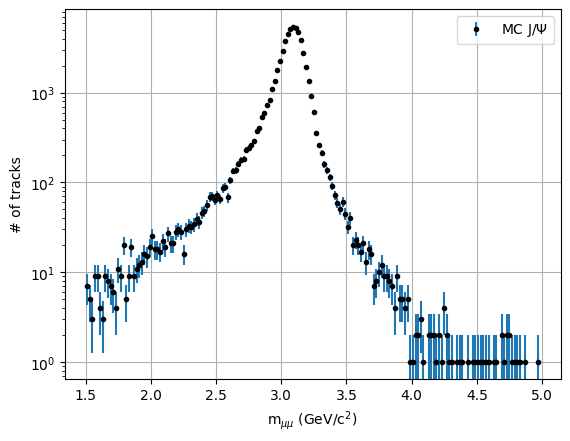

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [5372.424869656754, 3.0897159465434347, 0.07166606490687498, 1.0778933861713764, 2.972850778206496, 1.718345857387076, 2.9732228232208566]
pcov: 
 [[ 1.45623225e+03  4.23201193e-03 -1.53539538e-02 -1.22408613e-01
   1.03920453e-01 -2.74562913e-01  5.12919746e-01]
 [ 4.23201193e-03  2.81113184e-07 -1.37011316e-07 -4.96289472e-06
   1.41724892e-05 -2.00170160e-07 -3.71375360e-06]
 [-1.53539538e-02 -1.37011316e-07  3.54228835e-07  6.30598538e-06
  -1.23801174e-05  8.90690095e-06 -1.66684178e-05]
 [-1.22408613e-01 -4.96289472e-06  6.30598538e-06  3.04940610e-04
  -1.10569447e-03  1.45706353e-04 -2.32787765e-04]
 [ 1.03920453e-01  1.41724892e-05 -1.23801174e-05 -1.10569447e-03
   5.75949639e-03 -2.41074656e-04  2.97638718e-04]
 [-2.74562913e-01 -2.00170160e-07  8.90690095e-06  1.45706353e-04
  -2.41074656e-04  8.65915411e-04 -2.92360889e-03]
 [ 5.12919746e-01 -3.71375360e-06 -1.66684178e-05 -2.32787765e-04
   2.97638718e-04 -2.92360889e-03  1.42084187e-02]]
residual: 
 {'nfev': 15, 

fit error : 38.160888151960904


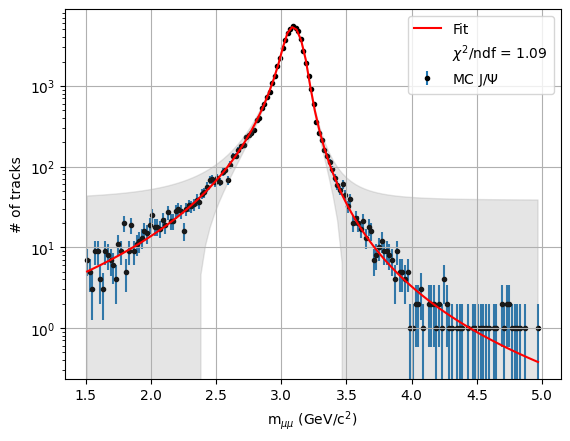

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

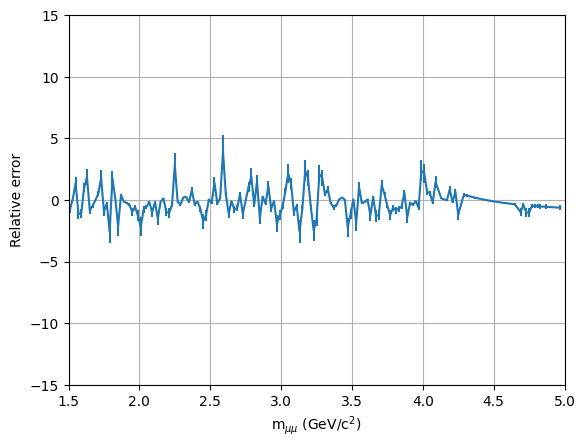

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

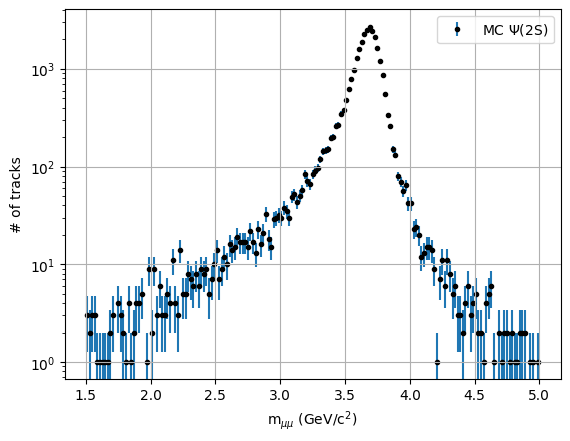

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [2582.000667200956, 3.6815756210136383, 0.0730460725635501, 1.0476399611949165, 2.7220262569754317, 1.7872214140250497, 2.905437825042548]
pcov: 
 [[ 7.78349724e+02  5.48185462e-03 -1.72426411e-02 -1.14782685e-01
   6.70293849e-02 -3.38199946e-01  7.50162792e-01]
 [ 5.48185462e-03  7.19902066e-07 -3.77235285e-07 -1.13964724e-05
   2.56483579e-05 -1.47817400e-06 -7.63623862e-06]
 [-1.72426411e-02 -3.77235285e-07  8.51778551e-07  1.36274187e-05
  -2.13225674e-05  2.30875076e-05 -5.02733795e-05]
 [-1.14782685e-01 -1.13964724e-05  1.36274187e-05  5.81840124e-04
  -1.69252987e-03  3.38919989e-04 -6.42253297e-04]
 [ 6.70293849e-02  2.56483579e-05 -2.13225674e-05 -1.69252987e-03
   7.26188900e-03 -4.38475547e-04  6.57064480e-04]
 [-3.38199946e-01 -1.47817400e-06  2.30875076e-05  3.38919989e-04
  -4.38475547e-04  2.69747282e-03 -1.00752652e-02]
 [ 7.50162792e-01 -7.63623862e-06 -5.02733795e-05 -6.42253297e-04
   6.57064480e-04 -1.00752652e-02  5.03112296e-02]]
residual: 
 {'nfev': 12, 

fit error : 27.900010363140037


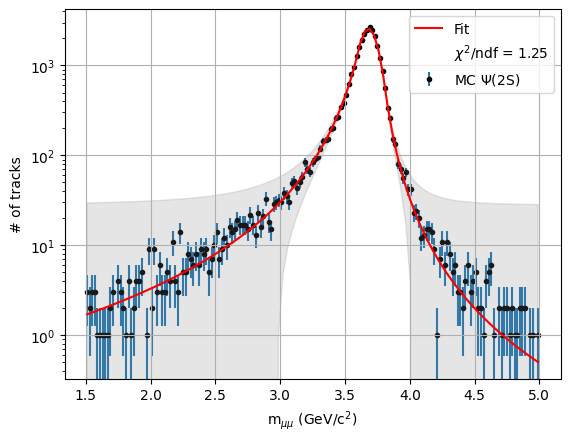

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

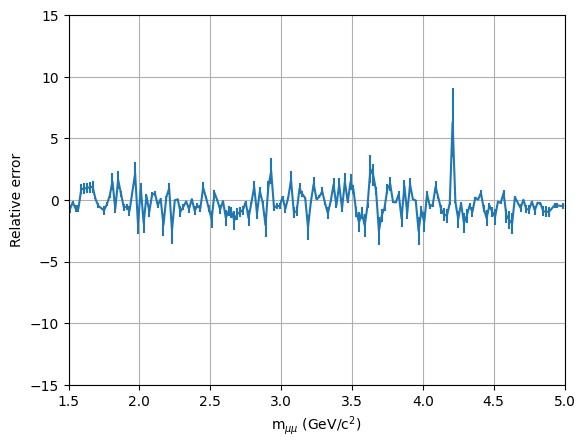

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

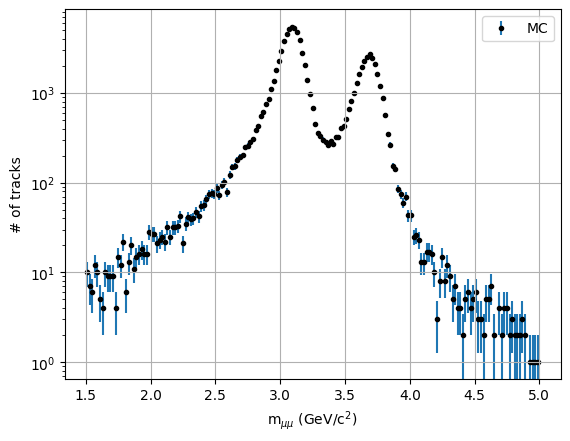

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [5369.73578868679, 3.0896371684183124, 0.07177941929733489, 2580.704054709621, 3.6814882822080612, 0.07329592878485958]
pcov: 
 [[ 1.63974537e+03  2.59939497e-03 -1.26313537e-02 -6.96320793e+00
  -5.80686402e-04  8.39236234e-04]
 [ 2.59939497e-03  2.32710510e-07 -3.21954961e-08  6.63970675e-05
   6.92970300e-09 -7.60765403e-09]
 [-1.26313537e-02 -3.21954961e-08  1.81975421e-07  3.87069090e-04
   2.30122776e-08 -3.57822049e-08]
 [-6.96320793e+00  6.63970675e-05  3.87069090e-04  7.68700508e+02
   3.91796914e-03 -1.30302840e-02]
 [-5.80686402e-04  6.92970300e-09  2.30122776e-08  3.91796914e-03
   5.25524297e-07 -1.43511995e-07]
 [ 8.39236234e-04 -7.60765403e-09 -3.57822049e-08 -1.30302840e-02
  -1.43511995e-07  4.22933963e-07]]
residual: 
 {'nfev': 4, 'fvec': array([-1.02830113e+00, -1.13811809e-02,  4.90575150e-01, -1.31516567e+00,
       -7.27973185e-01,  1.32544521e+00,  2.12119213e+00, -4.63421350e-01,
       -5.29724883e-02,  5.43164196e-02,  1.67040502e-01,  2.92833309e+00,


fit error : 49.07591951435961


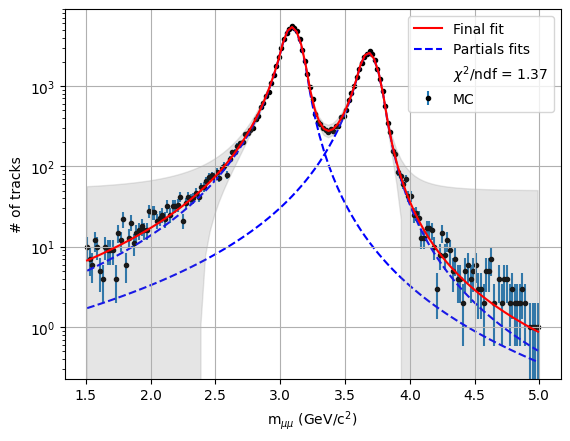

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_14303/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


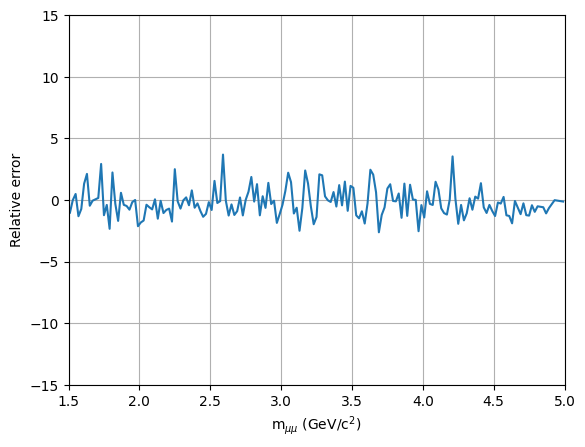

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

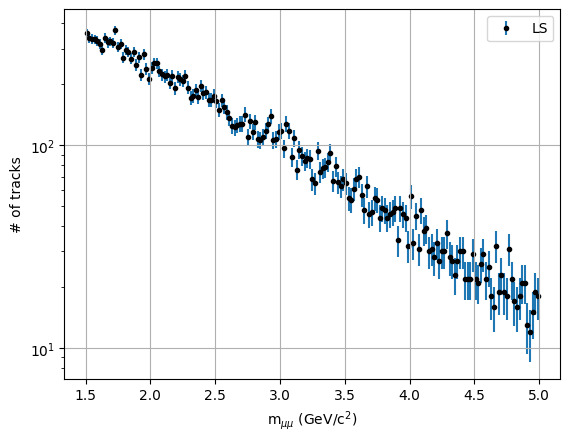

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [5.885259014043169, 5.084322895551419, 4.216050887664514, 3.871264541647228, 2.7507259439257314]
pcov: 
 [[ 4.57270169e-04 -8.31098104e-05  1.00561124e-04  2.62559714e-05
   2.29596234e-04]
 [-8.31098104e-05  1.23030385e-04  3.00265522e-05 -1.21693090e-05
   6.43867724e-05]
 [ 1.00561124e-04  3.00265522e-05  2.84930932e-04  2.31474076e-04
  -3.02388897e-05]
 [ 2.62559714e-05 -1.21693090e-05  2.31474076e-04  3.96767036e-04
  -6.39411254e-04]
 [ 2.29596234e-04  6.43867724e-05 -3.02388897e-05 -6.39411254e-04
   7.27101713e-03]]
residual: 
 {'nfev': 17, 'fvec': array([-0.05141908,  0.69177202,  0.57333743,  0.40186512,  0.39921528,
        0.855024  ,  1.6954156 , -1.01427449, -0.31000961, -0.79555365,
       -0.78733649, -3.4769484 , -0.42462122, -1.34706739,  1.06335512,
       -0.75140674, -0.54988029,  0.44647964, -1.05756085,  1.06179112,
       -0.56938355,  2.37620243, -1.64282579,  0.73695134,  2.2903101 ,
        0.09731532, -0.96334482, -1.20259992, -0.06099381,  0.224373

fit error : 0.09237432354060465


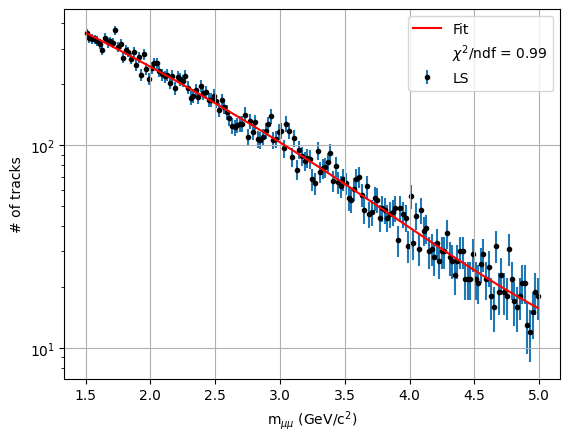

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

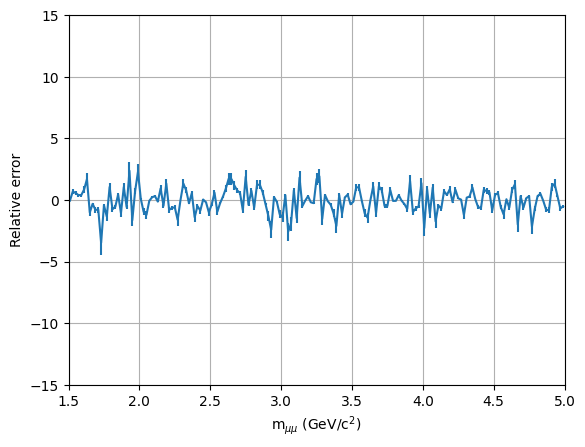

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

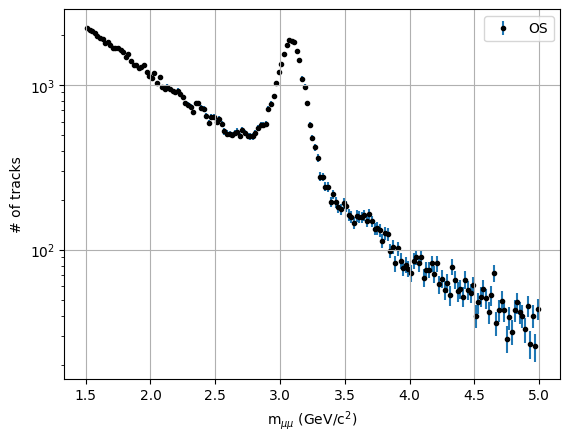

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [1659.2364915014005, 3.085523051074642, 0.07883267139756248, 25.27364605379568, 3.6852412152321423, 0.07075605281252507, 7.722802511117605, 6.364047060518837, 5.113865412467672, 4.684173904320946, 3.525947839490913]
pcov: 
 [[ 5.91409016e+02  3.06786878e-03 -1.78238125e-02  3.05015602e+00
  -1.64241273e-02  3.09014378e-02 -1.02885872e-02 -7.14575707e-03
  -3.63328499e-02 -2.20635941e-02 -1.68257572e-02]
 [ 3.06786878e-03  1.35596354e-06 -4.23193977e-07 -1.70913181e-04
   1.07011171e-06 -1.97190228e-06  3.33993547e-07  2.05847699e-06
   3.90320470e-06  1.86294951e-06  3.41298764e-06]
 [-1.78238125e-02 -4.23193977e-07  1.85005146e-06  1.17712308e-03
  -2.23681546e-06  5.82923810e-06 -2.76963332e-06 -6.44036224e-06
  -1.75035778e-05 -1.13959232e-05 -6.68624198e-06]
 [ 3.05015602e+00 -1.70913181e-04  1.17712308e-03  6.43911398e+01
   1.08364580e-02 -1.08021673e-01 -7.42760371e-03 -9.14631760e-03
  -4.55864730e-02 -4.51828692e-02  3.26903141e-02]
 [-1.64241273e-02  1.07011171e-06 -2

fit error : 25.608757279404653


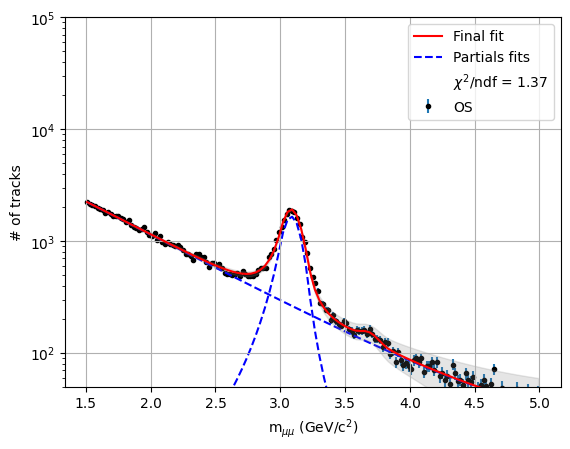

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

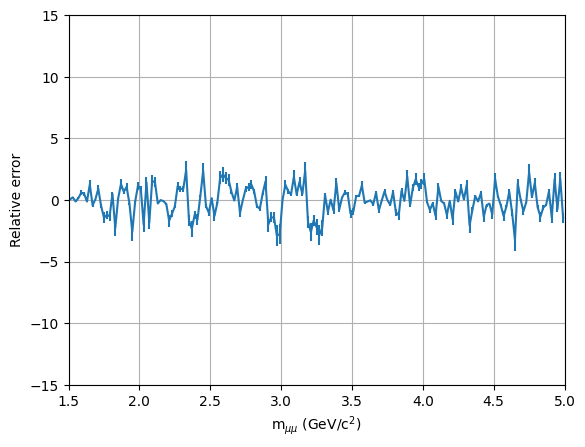

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  19717.756902835772  +/-  480.5565625522142 (stat.)
